# Lab 4. Work on complex numbers and classes
**Note** This topic is relatively simple, so it is marked out of a total of 5 marks. 

### Extend myComplex
The work is based upon the "myComplex" class defined in the Topic 3 lecture. You should extend the myComplex class and add overloaded methods for the following. Read the documentation at https://docs.python.org/3/library/operator.html to find out how to overload these operators:
   * subtraction 
   * multiplication
   * division

Write methods to calculate:
   * The complex conjugate
   * Rotate the phase of a complex number by an angle given as argument

Perform a few tests with a few example numbers to ensure things work as expected. Consider the complex numbers:
$$a=1+i\ \ \ \ b=3-2i\ \ \ c=i$$
$$d=7+2i\ \ \  f=2+\pi i$$
   * Use your notebook to calculate the following quantities, and compare with your expectations. 
$$a+b,\ \ b/c,\ \ \  c\times d$$
$$a^*,\ \ \ b^* b,\ \ f\times d$$
   * Rotate all the 5 numbers by $\pm$ 90 degrees. 

### Impedence vs frequency
The impedence of an RLC circuit is given by:
$$ Z = R + i \left(\frac{1}{\omega C} - \omega L \right) $$

   * Write a functions that calculates Z, given the four parameters R, L, C, omega
   * Fix L = 1000H, C=1 mF, R=480 Ohm. Plot the modulus of Z vs omega
   * Repeat with R=120 Ohm and 960 Ohm (and L=1000H and C=1 mF). Comment on the dependence of $|Z|$ on the resistance
   * Repeat with L=200 H and L=2000 H (and R=480 Ohm and C=1 mF). Comment on the dependence of $|Z|$ on the impedence
   * Plot the phase of Z vs omega with the original parameters. Comment on the graph
   * Repeat the 3 points above (e.g. $|Z|$ and phase of $Z$) using the python cmath.complex type

a+b is 4.000000 + -1.000000 i
b/c is -2.000000 + -3.000000 i
c times d is -2.000000 + 7.000000 i
The complex conjugate of a is 1.000000 + -1.000000 i
b times b* 13.000000 + 0.000000 i
f times d 7.716815 + 25.991149 i
a rotated by +90 degrees -1.000000 + 1.000000 i
a rotated by -90 degrees 1.000000 + -1.000000 i
b rotated by +90 degrees 2.000000 + 3.000000 i
b rotated by -90 degrees -2.000000 + -3.000000 i
c rotated by +90 degrees -1.000000 + 0.000000 i
c rotated by -90 degrees 1.000000 + 0.000000 i
d rotated by +90 degrees -2.000000 + 7.000000 i
d rotated by -90 degrees 2.000000 + -7.000000 i
f rotated by +90 degrees -3.141593 + 2.000000 i
f rotated by -90 degrees 3.141593 + -2.000000 i


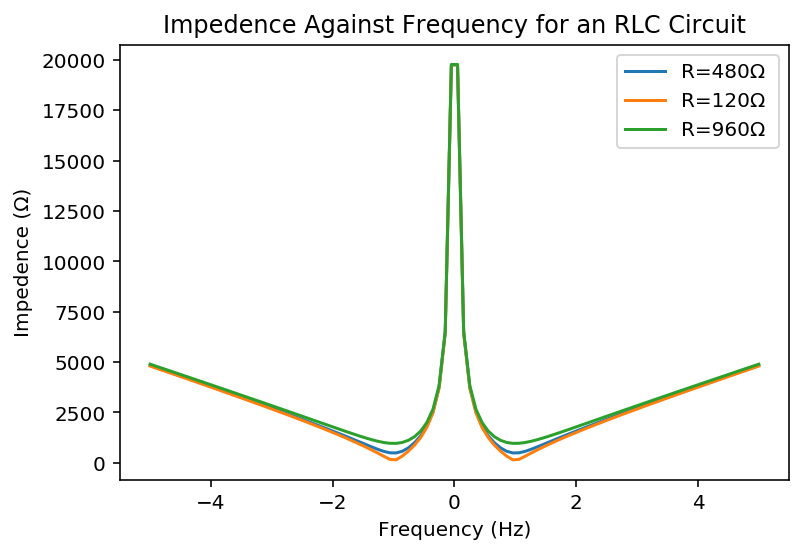

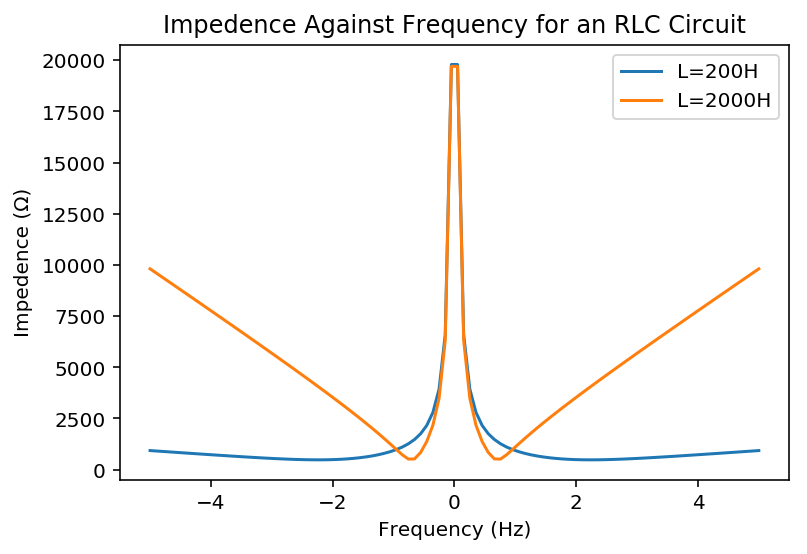

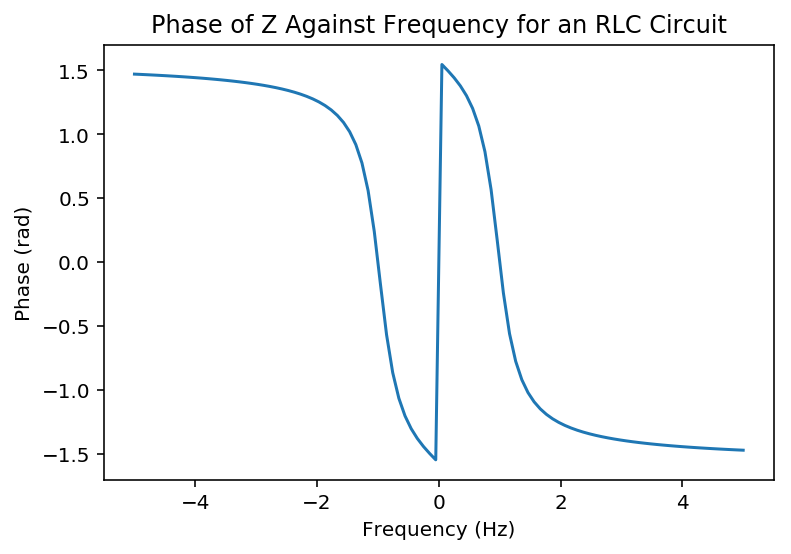

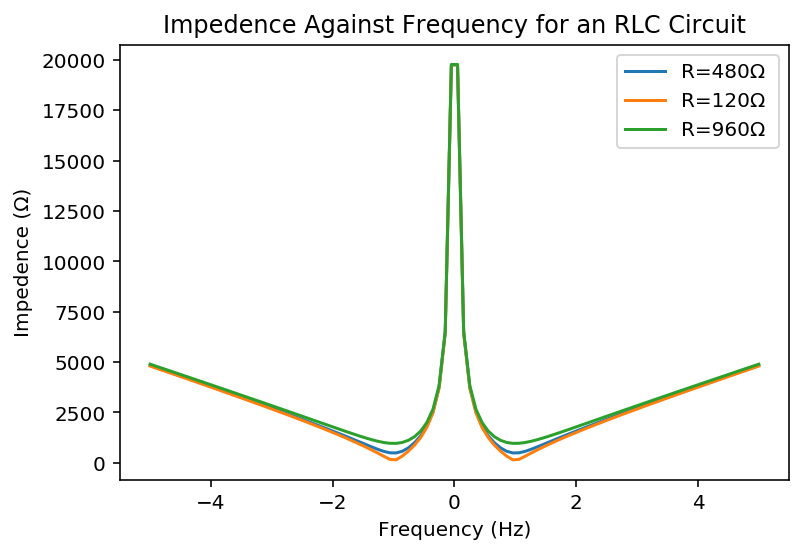

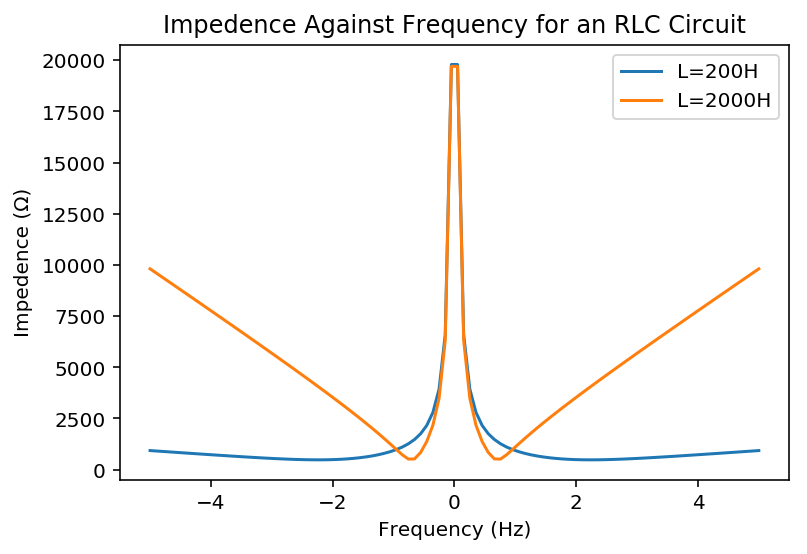

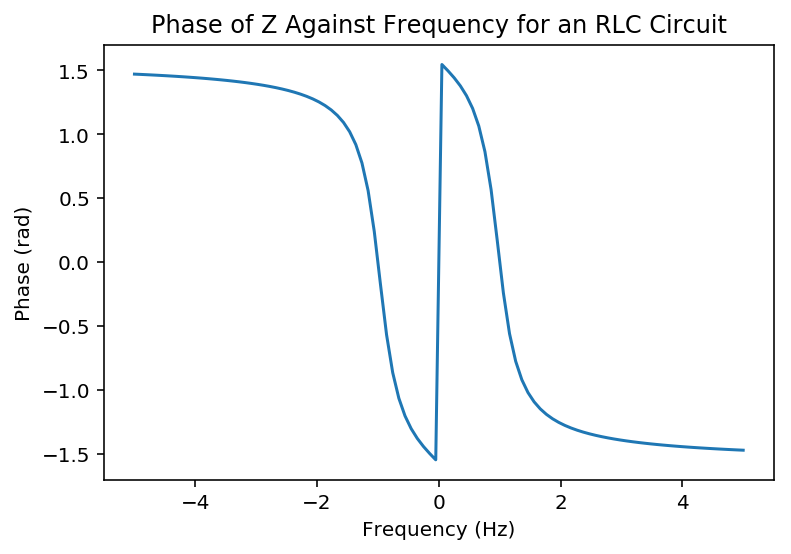

In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cmath

#Define our own complex number class
class myComplex:

    # __init__ is required for a class and specifies what happens when a new object is created
    # in our case, the class holds two float numbers (the real and imaginary part) which are initialised
    # by the arguments passed, or set to 0. if no arguments are passed
    def __init__(self,x=0.,y=0.):
        self.re=x
        self.im=y

    # This are methods returning the modulus and phase of a complex number
    def R(self):
        return math.sqrt(self.re**2+self.im**2)
    
    def phi(self):
        return math.atan2(self.im,self.re)

    # Or we can set modulus and phase
    def setRphi(self,R,phi):
        self.re=R*math.cos(phi)
        self.im=R*math.sin(phi)
        

    # Here we overload the "+" operator to add two numbers
    def __add__(self,other):
        return myComplex(self.re+other.re,self.im+other.im)
    
    # Here we overload the operator needed to print out complex numbers
    def __repr__(self):
        return '%f + %f i' %(self.re,self.im)
    
    #Define complex conjugate as complex number with negative imaginary part
    def conj(self):
        a = self.re
        b = (-1)*self.im
        return myComplex(a,b)
    
    #Overload subtraction operator by subtracting real and imaginary parts of two numbers seperately
    def __sub__(self,other):
        return myComplex(self.re-other.re,self.im-other.im)
    
    #Overload multiplication operator by multiplying out and adding cross terms
    def __mul__(self,other):
        return myComplex((self.re*other.re)-(self.im*other.im),(self.im*other.re)+(self.re*other.im))
    
    #Overload division by using complex conjugate of the denominator
    def __truediv__(self,other):
        denom = other*other.conj()
        num = self*other.conj()
        return myComplex(num.re/denom.re,num.im/denom.re)
    
    #Rotate by an angle by adding angle to phase
    def rotate(self,arg):
        phi = self.phi()
        R = self.R()
        rotre=R*math.cos(phi+arg)
        rotim=R*math.sin(phi+arg)
        return myComplex(rotre,rotim)
    
a = myComplex(1,1)
b = myComplex(3,-2)
c= myComplex(0,1)
d = myComplex(7,2)
f = myComplex(2,np.pi)


print ("a+b is",a+b)
print ("b/c is",b/c)
print ("c times d is",c*d)
print ("The complex conjugate of a is",a.conj())
print ("b times b*",b*b.conj())
print("f times d",f*d)
print("a rotated by +90 degrees", a.rotate(np.radians(90)))
print("a rotated by -90 degrees", a.rotate(np.radians(-90)))
print("b rotated by +90 degrees",b.rotate(np.radians(90)))
print("b rotated by -90 degrees",b.rotate(np.radians(-90)))
print("c rotated by +90 degrees",c.rotate(np.radians(90)))
print("c rotated by -90 degrees",c.rotate(np.radians(-90)))
print("d rotated by +90 degrees",d.rotate(np.radians(90)))
print("d rotated by -90 degrees",d.rotate(np.radians(-90)))
print("f rotated by +90 degrees",f.rotate(np.radians(90)))
print("f rotated by -90 degrees",f.rotate(np.radians(-90)))

#Function to calculate impedence as a complex number
def impedence(R,omega,C,L):
    return myComplex(R,(1)/(omega*C)-(omega*L))



#Function to plot impedence against frequency
def Zmodplot(R,C,L):
    omegaarray = np.linspace(-5,5,100)
    Zarray = []
    for i in omegaarray:
        Z = impedence(R,i,C,L)
        Zarray.append(Z.R())
    return plt.plot(omegaarray,Zarray)

#Plot for different values of R
#The modulus of Z has a larger dependence on R close to 0
#The minimum value of the modulus of Z increases with R
Zmodplot(480,0.001,1000)
Zmodplot(120,0.001,1000)
Zmodplot(960,0.001,1000)
plt.xlabel ('Frequency (Hz)')
plt.ylabel('Impedence (\u03A9)')
plt.title('Impedence Against Frequency for an RLC Circuit')
plt.legend(("R=480\u03A9","R=120\u03A9 ","R=960\u03A9"))
plt.show()

#Plot for different values of L
#For larger L a steeper increase in the modulus of impedence is seen as frequency increases
#The minimum of the modulus of Z decreases with higher L
Zmodplot(480,0.001,200)
Zmodplot(480,0.001,2000)
plt.xlabel ('Frequency (Hz)')
plt.ylabel('Impedence (\u03A9)')
plt.title('Impedence Against Frequency for an RLC Circuit')
plt.legend(("L=200H","L=2000H"))
plt.show()

#Function to plot graph of phase against freq
def Zphase(R,C,L):
    omegaarray = np.linspace(-5,5,100)
    Zarray = []
    for i in omegaarray:
        Z = impedence(R,i,C,L)
        Zarray.append(Z.phi())
    return plt.plot(omegaarray,Zarray)
        
#Plot for original parameters
#Values go between +pi/2 and -pi/2
#Phase steps from minimum to maximum as it passes 0
#In
Zphase(480,0.001,1000)
plt.xlabel ('Frequency (Hz)')
plt.ylabel('Phase (rad)')
plt.title('Phase of Z Against Frequency for an RLC Circuit')
plt.show()



#Repeat above steps using built-in complex function instead
#Modulus is abs
#Phase is cmath.phase

def impedence(R,omega,C,L):
    return complex(R,(1)/(omega*C)-(omega*L))

def Zmodplot2(R,C,L):
    omegaarray = np.linspace(-5,5,100)
    Zarray = []
    for i in omegaarray:
        Z = impedence(R,i,C,L)
        Zarray.append(abs(Z))
    return plt.plot(omegaarray,Zarray)



Zmodplot2(480,0.001,1000)
Zmodplot2(120,0.001,1000)
Zmodplot2(960,0.001,1000)
plt.xlabel ('Frequency (Hz)')
plt.ylabel('Impedence (\u03A9)')
plt.title('Impedence Against Frequency for an RLC Circuit')
plt.legend(("R=480\u03A9","R=120\u03A9 ","R=960\u03A9"))
plt.show()

Zmodplot2(480,0.001,200)
Zmodplot2(480,0.001,2000)
plt.xlabel ('Frequency (Hz)')
plt.ylabel('Impedence (\u03A9)')
plt.title('Impedence Against Frequency for an RLC Circuit')
plt.legend(("L=200H","L=2000H"))
plt.show()

def Zphase2(R,C,L):
    omegaarray = np.linspace(-5,5,100)
    Zarray = []
    for i in omegaarray:
        Z = impedence(R,i,C,L)
        Zarray.append(cmath.phase(Z))
    return plt.plot(omegaarray,Zarray)
        
Zphase2(480,0.001,1000)
plt.xlabel ('Frequency (Hz)')
plt.ylabel('Phase (rad)')
plt.title('Phase of Z Against Frequency for an RLC Circuit')
plt.show()

#Resulting plots are the same
#Complex class already built in